# Westeros Tutorial: Running MESSAGE in Recursive Dynamic Mode

While considering the full time horizon in a single run is useful for a long-term energy systems planning, the recursive dynamic approach can provide insights that reflect the relevant foresight windows decision makers can have in making adaptive and robust planning.

In addition to running the model with the perfect foresights, MESSAGE can also be run using the recursive dynamic approach. Here, the model is run iteratively throughout the periods with key decision variables from the previous periods, or iterations, are fixed so that new informations do not alter decisions that are already made in the previous periods. These variables
include $CAP$ , $CAP\_NEW$, $ACT$, and $EXT$. 

In this tutorial, we will implement the recursive dynamic mode on Westeros baseline scenario. Hence, before we start, we have to make sure that we can successfully run the baseline scenarion (``westeros_baseline.ipynb``).

Let's start with importing all the libraries we need and connect to the `ixmp` platform.

In [67]:
import pandas as pd
import ixmp
import message_ix

from message_ix.util import make_df

%matplotlib inline

In [68]:
mp = ixmp.Platform()

## Making a clone of the existing scenario 'baseline'

In [69]:
model = "Westeros Electrified"

base = message_ix.Scenario(mp, model=model, scenario="emission_bound")
scen = base.clone(
    model,
    "emission_bound_recursive-dynamic",
    "introducing recursive dynamic mode",
    keep_solution=False,
)
scen.check_out()

In [70]:
year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")
country = "Westeros"

## Time to Solve the Model

In perfect foresight mode, the solve statement we add is `scen.solve()` without any additional arguments. By default, this will tell MESSAGE to run in the perfect foreseight mode. To run MESSAGE using the recursive dynamic approach, we need to add `gams_args =["--foresight=X"]` argument to the solve statement, with `X` being the length of the foresight windows. This will pass the argument directly to `GAMS`, overiding the default values set in `MESSAGE_master.gms` and `model_setup.gms` scripts. Here, let's use `X=1` as an example.

In [71]:
scen.commit(comment="Introducing recursive dynamic mode in MESSAGE")
scen.set_as_default()

In [72]:
scen.solve(gams_args =["--foresight=1"])

In [73]:
scen.var("OBJ")["lvl"]

290222.5625

## Plotting Results

In [74]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scen)
prepare_plots(rep)

### Activity

How much energy is generated in each time period from the different potential sources?

<Axes: title={'center': 'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

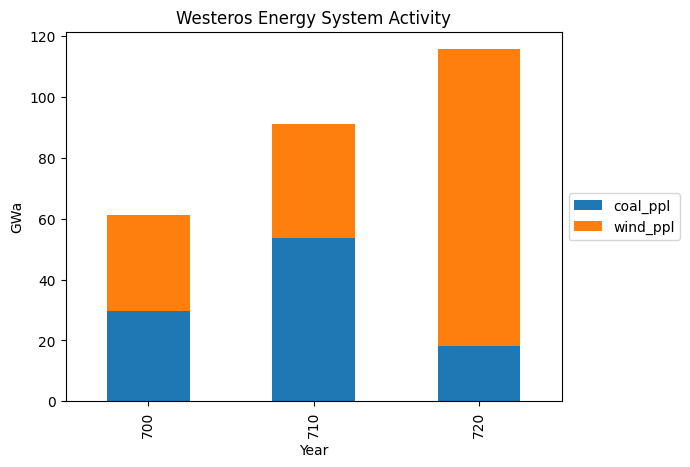

In [75]:
rep.set_filters(t=["coal_ppl", "wind_ppl"])
rep.get("plot activity")

### Capacity

How much capacity of each plant is installed in each period?

<Axes: title={'center': 'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

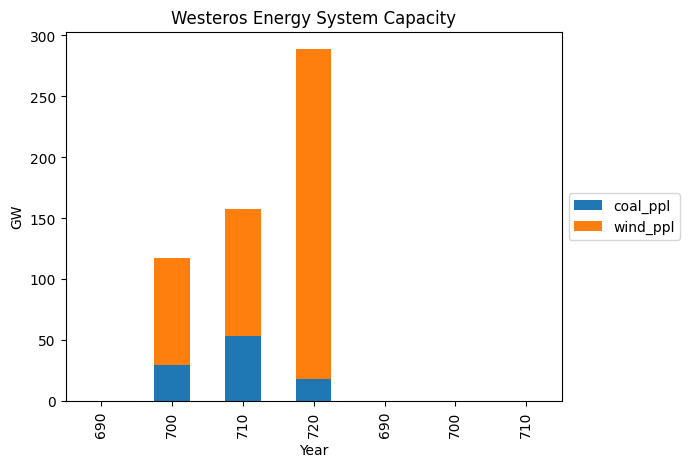

In [76]:
rep.get("plot capacity")

## Close the connection to the database

In [77]:
mp.close_db()